### Assignment:

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [179]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"])

In [180]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


### ~ T1 ~ 

In [181]:
df.set_index("date", inplace = True)

### ~ T2 ~

In [182]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### ~ T3 ~

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Daily freeCodecamp Forum Page Views 5/2016-12/2019')]

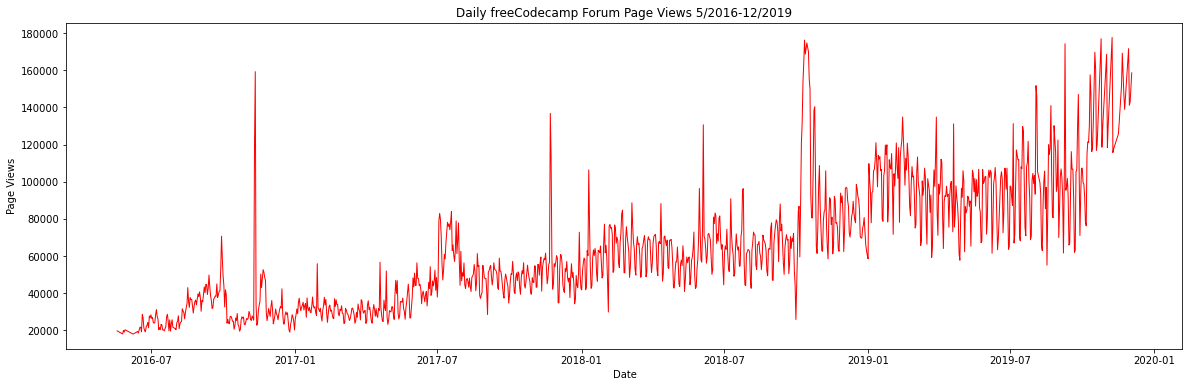

In [183]:
fig, ax= plt.subplots(figsize=(20,6))
ax.plot(df.index, df["value"], "r", linewidth=1)
ax.set(xlabel="Date", ylabel="Page Views", title="Daily freeCodecamp Forum Page Views 5/2016-12/2019")

### ~ T4 ~

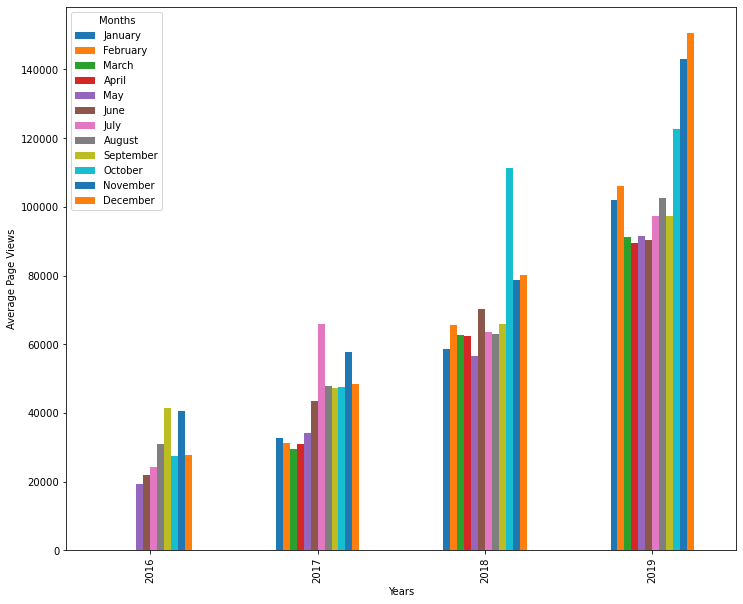

In [141]:
df["month"]= df.index.month
df["year"]= df.index.year
df_bar=df.groupby(["year","month"])["value"].mean()
df_bar= df_bar.unstack()
fig= df_bar.plot.bar(xlabel="Years", ylabel="Average Page Views", figsize=(12,10))
plt.legend(["January", "February","March","April", "May", "June", "July", "August", "September", "October", "November", "December"], title="Months", loc=2)

### ~ T5 ~

In [184]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"]=[d.strftime("%b") for d in df_box.date]

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

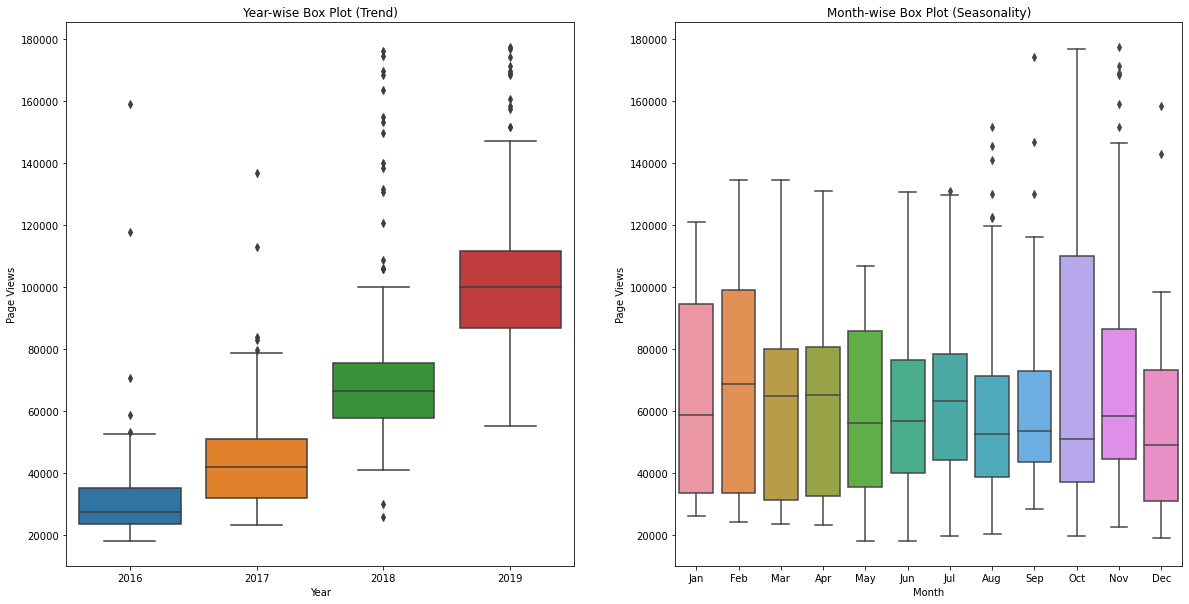

In [185]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0] =sns.boxplot(x=df_box["year"], y=df_box["value"], ax=axes[0])
orden = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
axes[1]= sns.boxplot(x=df_box["month"], y=df_box["value"], ax=axes[1], order= orden)
axes[0].set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel= "Page Views")
axes[1].set(title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel= "Page Views")

### _Nicolás Beltrán_